In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:

.from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


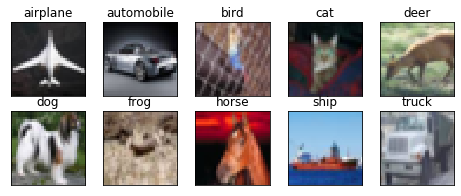

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# # Define the model
# model = Sequential()
# #model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
# model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1, input_shape = (32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1, input_shape = (32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# #model.add(SeparableConv2D(48, 3, 3))
# model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1, input_shape = (32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())

# model.add(Convolution2D(32, 1, activation='relu'))
# model.add(BatchNormalization())

# model.add(Convolution2D(10, 4))
# model.add(Flatten())
# model.add(Activation('softmax'))
# # model.add(Activation('relu'))
# # model.add(SeparableConv2D(96, 3, 3))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# # model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# # model.add(Activation('relu'))
# # model.add(SeparableConv2D(192, 3, 3))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.25))
# # model.add(Flatten())
# # model.add(Dense(512))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(256))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# #model.add(Dense(num_classes, activation='softmax'))
# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()


In [0]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rotation_range=20,
# 		zoom_range=0.15,
# 		width_shift_range=0.2,
# 		height_shift_range=0.2,
# 		shear_range=0.15,
# 		horizontal_flip=True,
# 		fill_mode="nearest")


# # train the model
# start = time.time()
# # Train the model
# model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
#                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
#                                  validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
# end = time.time()
# print ("Model took %0.2f seconds to train"%(end - start))
# # plot model history
# plot_model_history(model_info)
# # compute test accuracy
# print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


# from keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler, ModelCheckpoint
# def scheduler(epoch, lr):
#   return round(lr * 1/(1 +  0.215 * epoch), 10) #0.319
# checkpoint = ModelCheckpoint('/content/gdrive/My Drive/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 

# model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# #model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1)
# model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint],)

In [0]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(SeparableConv2D(48, 3, 3))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(Convolution2D(256, 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_34 (Separab (None, 32, 32, 32)        278       
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_35 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_37 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 64)       

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def scheduler(epoch, lr):
  return round(lr * 1/(1 +  0.215 * epoch), 10) #0.319
checkpoint = ModelCheckpoint('/content/gdrive/My Drive/model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 


datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1)
#model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1), checkpoint],)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`




Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.0299999993.
390/390 [==============================] - 77s 197ms/step - loss: 2.0873 - acc: 0.2926 - val_loss: 1.8183 - val_acc: 0.3643
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0246913575.
390/390 [==============================] - 69s 176ms/step - loss: 1.5881 - acc: 0.4123 - val_loss: 2.4223 - val_acc: 0.3103
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0172666841.
390/390 [==============================] - 69s 177ms/step - loss: 1.4063 - acc: 0.4857 - val_loss: 2.3851 - val_acc: 0.3385
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.010496464.
390/390 [==============================] - 69s 176ms/step - loss: 1.2575 - acc: 0.5418 - val_loss: 1.2215 - val_acc: 0.5674
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.00564326.
390/390 [==============================] - 69s 176ms/step - loss: 1.1324 - 

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 79s 202ms/step - loss: 1.6429 - acc: 0.4123 - val_loss: 1.4928 - val_acc: 0.4860
Epoch 2/50
390/390 [==============================] - 73s 187ms/step - loss: 1.3884 - acc: 0.5006 - val_loss: 1.4625 - val_acc: 0.4933
Epoch 3/50
390/390 [==============================] - 73s 187ms/step - loss: 1.2573 - acc: 0.5515 - val_loss: 1.2844 - val_acc: 0.5636
Epoch 4/50
390/390 [==============================] - 73s 188ms/step - loss: 1.1624 - acc: 0.5877 - val_loss: 1.2941 - val_acc: 0.5721
Epoch 5/50
390/390 [==============================] - 74s 189ms/step - loss: 1.0914 - acc: 0.6145 - val_loss: 0.9835 - val_acc: 0.6585
Epoch 6/50
390/390 [==============================] - 73s 188ms/step - loss: 1.0313 - acc: 0.6365 - val_loss: 0.8951 - val_acc: 0.6815
Epoch 7/50
390/390 [==============================] - 74s 191ms/step - loss: 0.9850 - acc: 0.6529 - val_loss: 1.0593 - val_acc: 0.6505
Epoch 8/50
390/390 [==============================] - 7

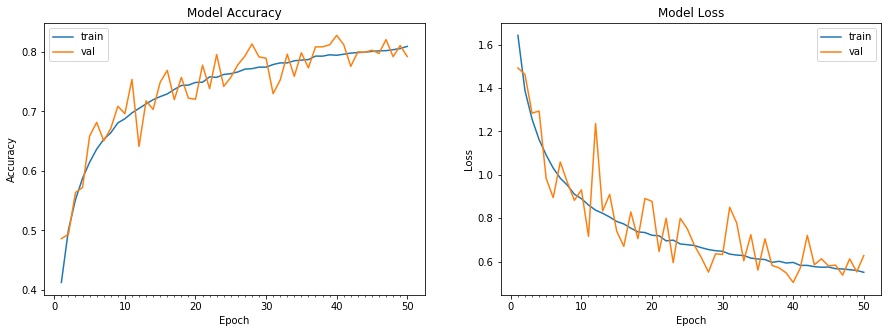

Accuracy on test data is: 79.23


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:

# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1, input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))


#model.add(SeparableConv2D(48, 3, 3))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(5, 5), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(5, 5), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(5, 5), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(Convolution2D(256, 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_214 (Separa (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_216 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_233 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_209 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_215 (Separa (None, 32, 32, 64)        4736      
_________________________________________________________________
batch_normalization_217 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_234 (Activation)  (None, 32, 32, 64)      

In [0]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 1024),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=48, epochs=50)`


Epoch 1/50
48/48 [==============================] - 86s 2s/step - loss: 2.0970 - acc: 0.2282 - val_loss: 2.5077 - val_acc: 0.2039
Epoch 2/50
48/48 [==============================] - 61s 1s/step - loss: 1.7950 - acc: 0.3309 - val_loss: 2.4974 - val_acc: 0.2181
Epoch 3/50
48/48 [==============================] - 61s 1s/step - loss: 1.6835 - acc: 0.3785 - val_loss: 2.2519 - val_acc: 0.2552
Epoch 4/50
48/48 [==============================] - 60s 1s/step - loss: 1.5937 - acc: 0.4129 - val_loss: 2.2847 - val_acc: 0.2751
Epoch 5/50
48/48 [==============================] - 61s 1s/step - loss: 1.5179 - acc: 0.4453 - val_loss: 2.3987 - val_acc: 0.2648
Epoch 6/50
48/48 [==============================] - 61s 1s/step - loss: 1.4544 - acc: 0.4717 - val_loss: 1.6195 - val_acc: 0.4210
Epoch 7/50
48/48 [==============================] - 62s 1s/step - loss: 1.4025 - acc: 0.4897 - val_loss: 1.6031 - val_acc: 0.4540
Epoch 8/50
48/48 [==============================] - 61s 1s/step - loss: 1.3558 - acc: 0.50

KeyboardInterrupt: ignored

In [0]:
#SqueezeNet Approach
  
from keras.models import Model, model_from_json
from keras.layers import Input, merge, AveragePooling2D, concatenate, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation, Flatten


#Modular function for Fire module in Squeeze net
# def fire_module(x, squeeze=16, expand=64):
# 		x = SeparableConv2D(filters = squeeze, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		x = Activation('relu')(x)
# 		x.summary()

# 		left = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		left = Activation('relu')(x)

# 		right= ZeroPadding2D(padding=(1, 1))(x)
# 		right = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		right = Activation('relu')(x)

# 		x = merge([left, right], mode = 'concat', concat_axis = 1)

def fire_module(x, squeeze=16, expand=64):
    x = Convolution2D(squeeze, 1, 1, border_mode='valid')(x)
    x = Activation('relu')(x)

    left = Convolution2D(expand, 1, 1, border_mode='valid')(x)
    left = Activation('relu')(left)

    right= ZeroPadding2D(padding=(1, 1))(x)
    right = Convolution2D(expand, 3, 3, border_mode='valid')(right)
    right = Activation('relu')(right)

    x = concatenate([left, right], axis=1)
    return x

def get_small_squeezenet(nb_classes):

    input_img = Input(shape=(32, 32, 3))
    x = Convolution2D(8, 3, 3, border_mode='same')(input_img)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)

    x = fire_module(x, 8, 64)
    x = fire_module(x, 8, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = fire_module(x, 32, 64)
    x = fire_module(x, 32, 64)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = fire_module(x, 32, 128)
    x = Dropout(0.5)(x)

    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Convolution2D(nb_classes, 1, 1, border_mode='valid')(x)

    # global pooling 
    x = GlobalAveragePooling2D()(x)
    out = Dense(nb_classes, activation='softmax')(x)
    model = Model(input=input_img, output=[out])
    return model

model = get_small_squeezenet(10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), padding="valid")`


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 32, 32, 8)    224         input_2[0][0]                    
__________________________________________________________________________________________________
activation_17 (Activation)      (None, 32, 32, 8)    0           conv2d_18[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 10, 10, 8)    0           activation_17[0][0]              
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (1, 1), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 32s 82ms/step - loss: 2.3028 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/50
390/390 [==============================] - 22s 56ms/step - loss: 2.3027 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/50
210/390 [===============>..............] - ETA: 9s - loss: 2.3028 - acc: 0.0996

KeyboardInterrupt: ignored

In [0]:
# Compile the model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 108),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=462, epochs=50)`


Epoch 1/50
462/462 [==============================] - 41s 90ms/step - loss: 2.0966 - acc: 0.1890 - val_loss: 1.9268 - val_acc: 0.2221
Epoch 2/50
462/462 [==============================] - 38s 82ms/step - loss: 1.8914 - acc: 0.2653 - val_loss: 1.7256 - val_acc: 0.3311
Epoch 3/50
462/462 [==============================] - 38s 81ms/step - loss: 1.7781 - acc: 0.3225 - val_loss: 1.6887 - val_acc: 0.3427
Epoch 4/50
462/462 [==============================] - 40s 86ms/step - loss: 1.7255 - acc: 0.3470 - val_loss: 1.6091 - val_acc: 0.3851
Epoch 5/50
462/462 [==============================] - 39s 85ms/step - loss: 1.6969 - acc: 0.3575 - val_loss: 1.6921 - val_acc: 0.3673
Epoch 6/50
462/462 [==============================] - 38s 83ms/step - loss: 1.6658 - acc: 0.3718 - val_loss: 1.5892 - val_acc: 0.3961
Epoch 7/50
462/462 [==============================] - 38s 81ms/step - loss: 1.6421 - acc: 0.3807 - val_loss: 1.5936 - val_acc: 0.4016
Epoch 8/50
462/462 [==============================] - 37s 79ms

KeyboardInterrupt: ignored

In [0]:
#SqueezeNet Approach
  
from keras.models import Model, model_from_json
from keras.layers import Input, merge, AveragePooling2D, concatenate, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Dense, Dropout, Activation, Flatten


#Modular function for Fire module in Squeeze net
# def fire_module(x, squeeze=16, expand=64):
# 		x = SeparableConv2D(filters = squeeze, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		x = Activation('relu')(x)
# 		x.summary()

# 		left = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		left = Activation('relu')(x)

# 		right= ZeroPadding2D(padding=(1, 1))(x)
# 		right = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 1)
# 		right = Activation('relu')(x)

# 		x = merge([left, right], mode = 'concat', concat_axis = 1)

def fire_module(x, squeeze=16, expand=64):
    x = SeparableConv2D(filters = squeeze, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2)(x)
    x = Activation('relu')(x)
    x = BatchNormalization()(x)

    left = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2)(x)
    left = Activation('relu')(left)
    left = BatchNormalization()(left)

    right= ZeroPadding2D(padding=(1, 1))(x)
    right = SeparableConv2D(filters = expand, kernel_size=(3, 3), padding = 'valid', strides = (1,1), depth_multiplier = 2)(right)
    right = Activation('relu')(right)
    right = BatchNormalization()(right)

    x = concatenate([left, right], axis=1)
    return x

def get_small_squeezenet(nb_classes):

    input_img = Input(shape=(32, 32, 3))
    x = Convolution2D(16, 3, 3, border_mode='same')(input_img)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3))(x)

    x = fire_module(x, 16, 64)
    x = BatchNormalization()(x)
    x = fire_module(x, 16, 64)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = fire_module(x, 32, 64)
    x = BatchNormalization()(x)
    x = fire_module(x, 32, 64)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = fire_module(x, 32, 128)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = ZeroPadding2D(padding=(1, 1))(x)
    x = Convolution2D(nb_classes, 1, 1, border_mode='valid')(x)

    # global pooling 
    x = GlobalAveragePooling2D()(x)
    out = Dense(nb_classes, activation='softmax')(x)
    model = Model(input=input_img, output=[out])
    return model

model = get_small_squeezenet(10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same")`


Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 32, 32, 16)   448         input_11[0][0]                   
__________________________________________________________________________________________________
activation_146 (Activation)     (None, 32, 32, 16)   0           conv2d_49[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_29 (MaxPooling2D) (None, 10, 10, 16)   0           activation_146[0][0]             
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [0]:
# Compile the model
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 1024),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=48, epochs=50)`


Epoch 1/50
48/48 [==============================] - 50s 1s/step - loss: 2.0154 - acc: 0.2312 - val_loss: 2.3239 - val_acc: 0.2221
Epoch 2/50
48/48 [==============================] - 41s 857ms/step - loss: 1.7493 - acc: 0.3482 - val_loss: 1.9767 - val_acc: 0.3384
Epoch 3/50
48/48 [==============================] - 41s 853ms/step - loss: 1.6191 - acc: 0.4035 - val_loss: 1.9517 - val_acc: 0.3210
Epoch 4/50
48/48 [==============================] - 41s 850ms/step - loss: 1.5303 - acc: 0.4364 - val_loss: 1.8324 - val_acc: 0.3615
Epoch 5/50
48/48 [==============================] - 41s 848ms/step - loss: 1.4750 - acc: 0.4608 - val_loss: 3.0421 - val_acc: 0.2604
Epoch 6/50
48/48 [==============================] - 41s 846ms/step - loss: 1.4312 - acc: 0.4758 - val_loss: 3.0202 - val_acc: 0.2613
Epoch 7/50
48/48 [==============================] - 41s 847ms/step - loss: 1.3953 - acc: 0.4915 - val_loss: 1.8454 - val_acc: 0.4154
Epoch 8/50
48/48 [==============================] - 41s 855ms/step - los

KeyboardInterrupt: ignored

In [0]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(SeparableConv2D(48, 3, 3))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))


# model.add(Convolution2D(256, 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_73 (Separab (None, 32, 32, 32)        278       
_________________________________________________________________
batch_normalization_71 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_80 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_74 (Separab (None, 32, 32, 128)       8896      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 128)     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 65s 166ms/step - loss: 1.8419 - acc: 0.3332 - val_loss: 1.6536 - val_acc: 0.4298
Epoch 2/50
390/390 [==============================] - 58s 149ms/step - loss: 1.5401 - acc: 0.4370 - val_loss: 1.5986 - val_acc: 0.4596
Epoch 3/50
390/390 [==============================] - 58s 149ms/step - loss: 1.3825 - acc: 0.4995 - val_loss: 1.1709 - val_acc: 0.5816
Epoch 4/50
390/390 [==============================] - 58s 149ms/step - loss: 1.2730 - acc: 0.5434 - val_loss: 1.1770 - val_acc: 0.5822
Epoch 5/50
390/390 [==============================] - 58s 149ms/step - loss: 1.1906 - acc: 0.5731 - val_loss: 1.1607 - val_acc: 0.5921
Epoch 6/50
390/390 [==============================] - 58s 149ms/step - loss: 1.1279 - acc: 0.5973 - val_loss: 0.9533 - val_acc: 0.6715
Epoch 7/50
390/390 [==============================] - 58s 149ms/step - loss: 1.0678 - acc: 0.6214 - val_loss: 0.9551 - val_acc: 0.6715
Epoch 8/50
390/390 [==============================] - 5

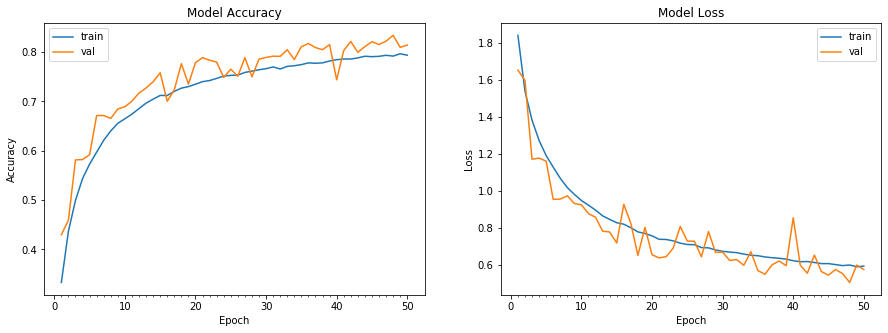

Accuracy on test data is: 81.42


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(SeparableConv2D(48, 3, 3))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, kernel_initializer="he_normal", use_bias=False))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 64, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2, kernel_initializer="he_normal", use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


#model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, kernel_initializer="he_normal", use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2, kernel_initializer="he_normal", use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))

# model.add(SeparableConv2D(filters = 128, kernel_size=(3, 3), padding = 'same', strides = (2,2), depth_multiplier = 2))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.1))


# model.add(Convolution2D(256, 1, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_29 (Separab (None, 32, 32, 32)        246       
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_30 (Separab (None, 32, 32, 64)        4672      
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=48, epochs=50)`


Epoch 1/50
48/48 [==============================] - 46s 961ms/step - loss: 2.0417 - acc: 0.2678 - val_loss: 1.8154 - val_acc: 0.3555
Epoch 2/50
48/48 [==============================] - 43s 903ms/step - loss: 1.6853 - acc: 0.3783 - val_loss: 1.5424 - val_acc: 0.4376
Epoch 3/50
48/48 [==============================] - 43s 902ms/step - loss: 1.5669 - acc: 0.4256 - val_loss: 1.4387 - val_acc: 0.4757
Epoch 4/50
48/48 [==============================] - 43s 896ms/step - loss: 1.4795 - acc: 0.4636 - val_loss: 1.3654 - val_acc: 0.5083
Epoch 5/50
48/48 [==============================] - 43s 897ms/step - loss: 1.4021 - acc: 0.4941 - val_loss: 1.2828 - val_acc: 0.5335
Epoch 6/50
48/48 [==============================] - 43s 897ms/step - loss: 1.3444 - acc: 0.5130 - val_loss: 1.3644 - val_acc: 0.5196
Epoch 7/50
48/48 [==============================] - 43s 897ms/step - loss: 1.2975 - acc: 0.5330 - val_loss: 1.4417 - val_acc: 0.5124
Epoch 8/50
48/48 [==============================] - 43s 893ms/step - 

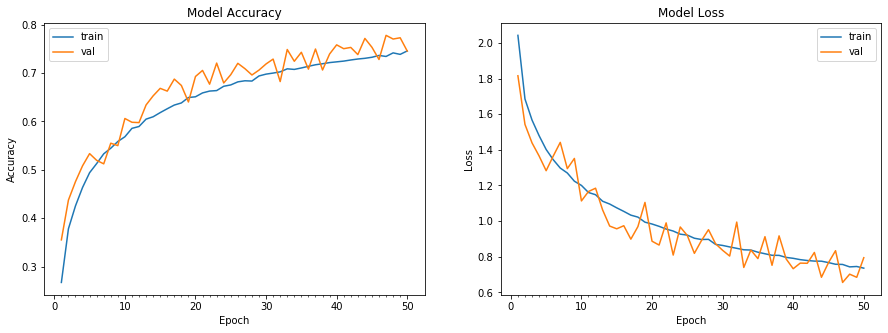

Accuracy on test data is: 74.52


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 1024),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(256, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_92 (Separab (None, 32, 32, 32)        246       
_________________________________________________________________
depthwise_conv2d_33 (Depthwi (None, 32, 32, 32)        288       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 32)        1056      
_________________________________________________________________
batch_normalization_107 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_116 (Dropout)        (None, 32, 32, 32)        0         
_________________________________________________________________
depthwise_conv2d_34 (Depthwi (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 73s 188ms/step - loss: 1.6154 - acc: 0.4187 - val_loss: 1.8261 - val_acc: 0.3673
Epoch 2/50
390/390 [==============================] - 66s 170ms/step - loss: 1.3689 - acc: 0.5084 - val_loss: 1.8926 - val_acc: 0.4100
Epoch 3/50
390/390 [==============================] - 66s 170ms/step - loss: 1.2176 - acc: 0.5650 - val_loss: 3.9839 - val_acc: 0.1900
Epoch 4/50
390/390 [==============================] - 66s 169ms/step - loss: 1.1110 - acc: 0.6053 - val_loss: 1.5775 - val_acc: 0.4714
Epoch 5/50
390/390 [==============================] - 66s 170ms/step - loss: 1.0347 - acc: 0.6344 - val_loss: 1.5513 - val_acc: 0.5448
Epoch 6/50
390/390 [==============================] - 66s 170ms/step - loss: 0.9721 - acc: 0.6568 - val_loss: 1.9438 - val_acc: 0.4780
Epoch 7/50
390/390 [==============================] - 66s 170ms/step - loss: 0.9305 - acc: 0.6731 - val_loss: 1.7264 - val_acc: 0.5443
Epoch 8/50
390/390 [==============================] - 6

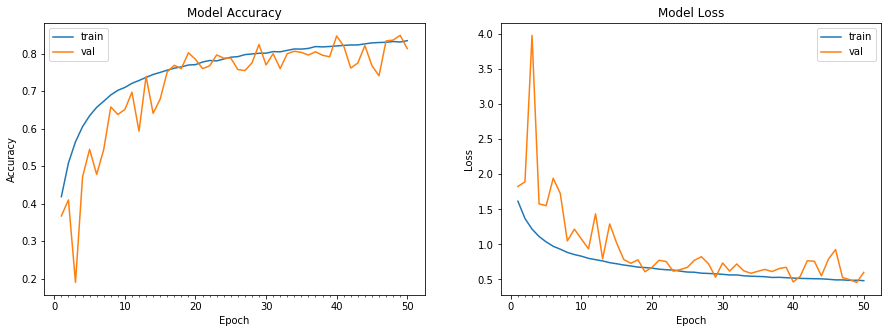

Accuracy on test data is: 81.35


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))




model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_95 (Separab (None, 32, 32, 32)        246       
_________________________________________________________________
depthwise_conv2d_65 (Depthwi (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 16)        1040      
_________________________________________________________________
batch_normalization_139 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_148 (Dropout)        (None, 32, 32, 16)        0         
_________________________________________________________________
depthwise_conv2d_66 (Depthwi (None, 32, 32, 32)        288       
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 32, 32, 32)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 84s 216ms/step - loss: 2.0540 - acc: 0.2764 - val_loss: 1.6475 - val_acc: 0.4104
Epoch 2/50
390/390 [==============================] - 74s 190ms/step - loss: 1.6850 - acc: 0.4059 - val_loss: 1.5927 - val_acc: 0.4562
Epoch 3/50
390/390 [==============================] - 74s 190ms/step - loss: 1.5244 - acc: 0.4685 - val_loss: 1.3739 - val_acc: 0.5198
Epoch 4/50
390/390 [==============================] - 74s 190ms/step - loss: 1.4161 - acc: 0.5052 - val_loss: 1.7157 - val_acc: 0.4638
Epoch 5/50
390/390 [==============================] - 74s 190ms/step - loss: 1.3381 - acc: 0.5369 - val_loss: 1.5517 - val_acc: 0.5147
Epoch 6/50
390/390 [==============================] - 74s 190ms/step - loss: 1.2504 - acc: 0.5630 - val_loss: 2.2567 - val_acc: 0.4120
Epoch 7/50
390/390 [==============================] - 74s 190ms/step - loss: 1.1538 - acc: 0.5911 - val_loss: 1.2611 - val_acc: 0.5726
Epoch 8/50
390/390 [==============================] - 7

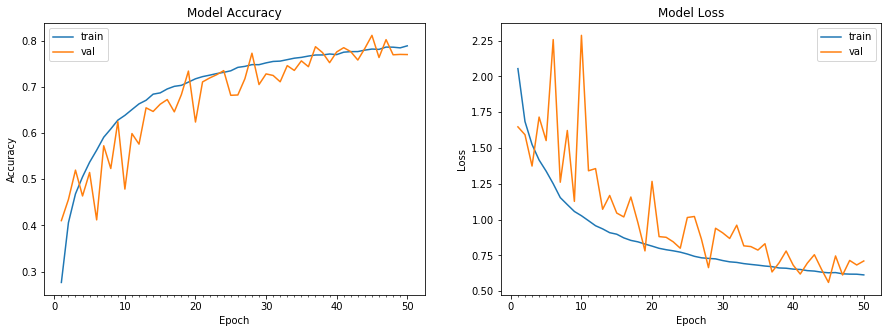

Accuracy on test data is: 77.02


In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [37]:
# Define the model
model = Sequential()
#model.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(SeparableConv2D(filters = 32, kernel_size=(3, 3), padding = 'same', strides = (1,1), depth_multiplier = 2, input_shape = (32, 32, 3), use_bias=False))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2, 2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(16, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(32, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(64, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=1, dilation_rate=(1, 1), activation='relu', use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(128, 1))
model.add(BatchNormalization())
model.add(Dropout(0.1))




model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(SeparableConv2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(SeparableConv2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()








Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        246       
_________________________________________________________________
depthwise_conv2d_115 (Depthw (None, 32, 32, 64)        576       
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 32, 32, 16)        1040      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
depthwise_conv2d_116 (Depthw (None, 32, 32, 32)        288       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 32)

In [35]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(48, 1))#32
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='valid', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(48, 1))#30
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
# model.add(Convolution2D(48, 1))#15

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(96, 1))#15
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='valid', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(96, 1))#13
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='valid', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
# model.add(Convolution2D(96, 1))#6

model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
#model.add(Convolution2D(192, 1))#6
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(1, 1), padding='valid', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(192, 1))#4
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(DepthwiseConv2D(kernel_size=(3, 3), strides=(2,2), padding='same', depth_multiplier=2, dilation_rate=(1, 1), activation='relu', input_shape=(32, 32, 3), use_bias=False, depthwise_initializer='glorot_uniform', bias_initializer='zeros'))
model.add(Convolution2D(192, 1))#2

model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))
# model.add(Convolution2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
#model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_127 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
depthwise_conv2d_108 (Depthw (None, 32, 32, 96)        864       
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 32, 32, 48)        4656      
_________________________________________________________________
depthwise_conv2d_109 (Depthw (None, 30, 30, 96)        864       
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 30, 30, 48)        4656      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
depthwise_conv2d_110 (Depthw (None, 15, 15, 96)      

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`


ValueError: ignored